# Цель лабораторной работы
Изучение линейных моделей, SVM и деревьев решений.

# Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.

2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.

4. Обучите следующие модели: 
 - одну из линейных моделей;
  - SVM;
   - дерево решений.

5. Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.

6. Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.

7. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

## Дополнительные задания:
 - Визуализируйте дерево решений.
 

### 1. Выбор набора данных (датасета) для решения задачи классификации или регресии.

In [463]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO 
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import export_graphviz, plot_tree
# Enable inline plots
%matplotlib inline 
sns.set(style="ticks")

In [142]:
# data = pd.read_csv('data/covid_19_clean_complete.csv', sep=',')
data = pd.read_csv('data/vgsales.csv', sep=',')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [143]:
data.shape 

(16598, 11)

In [144]:
data.isnull().sum() 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [145]:
data.dtypes 

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### 2. Заполнение пропусков и кодирование категориальных признаков

#### Заполнение пропусков

In [146]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета набора 1
num_cols = []
total_count = data.shape[0]
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Year. Тип данных float64. Количество пустых значений 271, 1.63%.


In [147]:
# Фильтр по колонкам с пропущенными значениями  набора 1
data_num = data[num_cols].mean()
data_num

Year    2006.406443
dtype: float64

In [148]:
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

In [149]:
# data = data.fillna(0)
data.isnull().sum() 

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [150]:
data = data.fillna('')
data.isnull().sum() 

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [151]:
data.dtypes 

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

#### Кодирование категориальных признаков числовыми

In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Name'] = le.fit_transform(data['Name'])
data['Platform'] = le.fit_transform(data['Platform'])
data['Genre'] = le.fit_transform(data['Genre'])
data['Publisher'] = le.fit_transform(data['Publisher'])
data.dtypes

Rank              int64
Name              int64
Platform          int64
Year            float64
Genre             int64
Publisher         int64
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [153]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,11007,26,2006.0,10,360,41.49,29.02,3.77,8.46,82.74
1,2,9327,11,1985.0,4,360,29.08,3.58,6.81,0.77,40.24
2,3,5573,26,2008.0,6,360,15.85,12.88,3.79,3.31,35.82
3,4,11009,26,2009.0,10,360,15.75,11.01,3.28,2.96,33.00
4,5,7346,5,1996.0,7,360,11.27,8.89,10.22,1.00,31.37


### 3. Разделение выборки на обучающую и тестовую с использованием метода train_test_split.

##### Х - признаки,  У - целевые значения

In [154]:
# # Масштабирование данных в диапазоне от 0 до 1
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    sc1_data, data['Global_Sales'], test_size=0.26, random_state=1)

X_train_1.shape, X_test_1.shape

((12282, 11), (4316, 11))

In [155]:
x_array = data['Rank'].values 
y_array = data['Global_Sales'].values 

In [156]:
X_train, X_test, y_train, y_test = train_test_split(x_array, y_array,
test_size=0.26, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12282,), (4316,), (12282,), (4316,))

## 4. Обучение моделей 
### 4.1. Линейная модель
### Полином

In [157]:
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('linear', LinearRegression(fit_intercept=False))])

poly_model.fit(x_array.reshape(-1, 1), y_array)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [158]:
poly_y_pred = poly_model.predict(x_array.reshape(-1, 1))

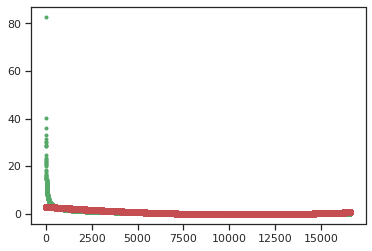

Степени полинома [ 2.94125471e+00 -5.91307003e-04  2.72629824e-08] 0.0


<bound method BaseEstimator.__repr__ of Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)>

In [159]:
plt.plot(x_array, y_array, 'g.')
# plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
plt.plot(x_array, poly_y_pred, 'ro')
plt.show()
print('Степени полинома', poly_model.named_steps['linear'].coef_, poly_model.named_steps['linear'].intercept_)
poly_model.__repr__

### Оценка качества



In [160]:
def eval_model(y,predicted):
    mae = mean_absolute_error(y, predicted)
    mse = mean_squared_error(y, predicted)
    r2 = r2_score(y, predicted)
    print('MAE ', mae)
    print('MSE ', mse)
    print('R2  ', r2)
    return mae, mse, r2

In [161]:
poly_mae, poly_mse, poly_r2 = eval_model(y_array, poly_y_pred)

MAE  0.4409386981151588
MSE  1.662735946164361
R2   0.31234111102885065


### 4.2. SVM


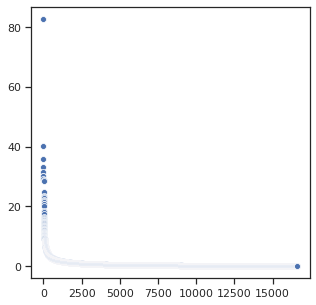

In [162]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x=x_array, y=y_array)

In [163]:
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(x_array.reshape(-1, 1), y_array)
    y_array_pred = clf.predict(x_array.reshape(-1, 1))


### SVR

In [283]:
svr_1 = SVR()
svr_1.fit(X_train_1, y_train_1)

y_pred_1 = svr_1.predict(X_test_1)
svr_1.__repr__

<bound method BaseEstimator.__repr__ of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>

In [284]:
svr_1.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Оценка качества

In [166]:
svr_mae, svr_mse, r2 = eval_model(y_test_1, y_pred_1)

MAE  0.0804143007306765
MSE  0.18302966929993325
R2   0.9005914898410706


### 4.3. Дерево решений.



In [476]:
# Обучим дерево на всех признаках 
tree_regr = DecisionTreeRegressor(random_state=1)
tree_regr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
tree_regr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

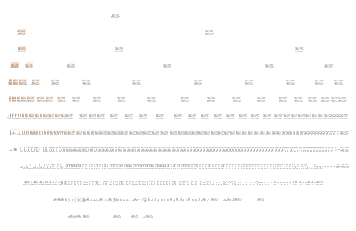

In [477]:
plot_tree(tree_regr, filled=True);

In [170]:
tree_regr_predict = tree_regr.predict(X_test.reshape(-1,1))
tree_regr_predict.shape

(4316,)

### Оценка качества

In [171]:
tree_mae, tree_mse, tree_r2 = eval_model(y_test.reshape(-1,1), tree_regr_predict)

MAE  0.0026807228915665697
MSE  0.0029771779425393865
R2   0.998383011754991


## 5. Оценка качества моделей с помощью трех подходящих для задачи метрик. Сравнение качества полученных моделей.



In [451]:
print('POLY')
print('mae: {}, mse: {}, r2: {}'.format(poly_mae, poly_mse, poly_r2))
print()
print('SVR')
print('mae: {}, mse: {}, r2: {}'.format(svr_mae, svr_mse, svr_r2))
print()
print('TREE')
print('mae: {}, mse: {}, r2: {}'.format(tree_mae, tree_mse, tree_r2)) 

POLY
mae: 0.4409386981151588, mse: 1.662735946164361, r2: 0.31234111102885065

SVR
mae: 0.0804143007306765, mse: 0.18302966929993325, r2: 0.9005914898410706

TREE
mae: 0.0026807228915665697, mse: 0.0029771779425393865, r2: 0.998383011754991


## 6. Подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.


### 6.1 Linear

In [322]:
PolynomialFeatures().get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [323]:
LinearRegression().get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [408]:
params = {
    'poly__degree': [ 1, 2, 3]
#     'linear__copy_X': [True, False]
}

In [409]:
poly_model = Pipeline([('poly', PolynomialFeatures()),
                       ('linear', LinearRegression(fit_intercept=False))])

In [410]:
poly_model.get_params()

{'memory': None,
 'steps': [('poly',
   PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                      order='C')),
  ('linear',
   LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False))],
 'verbose': False,
 'poly': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                    order='C'),
 'linear': LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False),
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'linear__copy_X': True,
 'linear__fit_intercept': False,
 'linear__n_jobs': None,
 'linear__normalize': False}

In [411]:
%%time
grid_1 = GridSearchCV(estimator=poly_model,
                    param_grid=params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
grid_1.fit(data, data['Global_Sales'])
grid_1.estimator.get_params().keys()

CPU times: user 106 ms, sys: 12.1 ms, total: 118 ms
Wall time: 1.61 s


dict_keys(['memory', 'steps', 'verbose', 'poly', 'linear', 'poly__degree', 'poly__include_bias', 'poly__interaction_only', 'poly__order', 'linear__copy_X', 'linear__fit_intercept', 'linear__n_jobs', 'linear__normalize'])

In [412]:
-grid_1.best_score_, grid_1.best_params_

(1.6394753926644193e-15, {'poly__degree': 1})

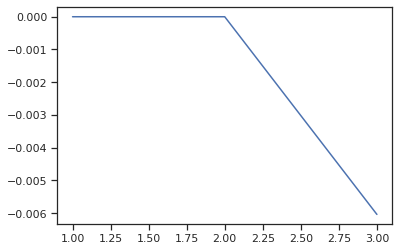

In [414]:
plt.plot(params['poly__degree'], grid_1.cv_results_["mean_test_score"]);

### 6.2 SVR

In [218]:
SVR().get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [311]:
params = {
#     'degree': [ 1,2],
#     'C': [0.08, 0.09, 0.1]
    'epsilon' : [0.2, 0.3, 0.4, 0.5]
}

In [312]:
%%time
grid_1 = GridSearchCV(estimator=SVR(),
                    param_grid=params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
grid_1.fit(data, data['Global_Sales'])

CPU times: user 3.13 s, sys: 11.8 ms, total: 3.14 s
Wall time: 11.5 s


GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'epsilon': [0.2, 0.3, 0.4, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [313]:
-grid_1.best_score_, grid_1.best_params_

(0.55274376514688, {'epsilon': 0.4})

In [314]:
# plt.plot(params['C'], grid_1.cv_results_["mean_test_score"]);

In [315]:
# plt.plot(params['degree'], grid_1.cv_results_["mean_test_score"]);

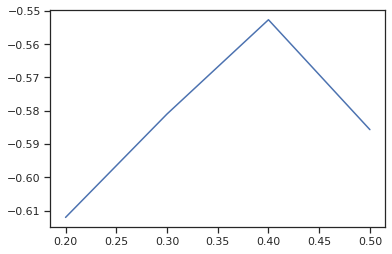

In [316]:
plt.plot(params['epsilon'], grid_1.cv_results_["mean_test_score"]);

In [317]:
# plt.plot(params['cache_size'], grid_1.cv_results_["mean_test_score"]);

### 6.3 Decision tree

In [430]:
DecisionTreeRegressor(random_state=1).get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

In [456]:
params = {
    'max_depth': [ 8, 9, 10,15],
#     'min_samples_leaf': [0.001, 0.002, 0.003],
#     'max_features': [0.6, 0.7, 0.8 ]
}

In [457]:
%%time
grid_1 = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                    param_grid=params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
grid_1.fit(data, data['Global_Sales'])

CPU times: user 179 ms, sys: 11.8 ms, total: 191 ms
Wall time: 511 ms


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 15]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [458]:
-grid_1.best_score_, grid_1.best_params_

(0.3888997849707991, {'max_depth': 9})

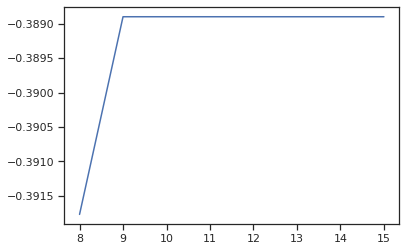

In [459]:
plt.plot(params['max_depth'], grid_1.cv_results_["mean_test_score"]);


## 7. Повтор пункта 4 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством моделей, полученных в пункте 4.

### 7.1 Linear

In [415]:
poly_model = Pipeline([('poly', PolynomialFeatures(degree=1)),
                       ('linear', LinearRegression(fit_intercept=False))])

poly_model.fit(x_array.reshape(-1, 1), y_array)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [416]:
poly_y_pred_gs = poly_model.predict(x_array.reshape(-1, 1))

In [417]:
poly_mae_gs, poly_mse_gs, poly_r2_gs = eval_model(y_array, poly_y_pred)

MAE  0.4409386981151588
MSE  1.662735946164361
R2   0.31234111102885065


Значения из 4 пункта

In [418]:
print('MAE ', poly_mae)
print('MSE ', poly_mse)
print('R2  ', poly_r2)


MAE  0.4409386981151588
MSE  1.662735946164361
R2   0.31234111102885065


In [419]:
print('MAE     ',poly_mae_gs - poly_mae)
print('MSE  ',poly_mse_gs - poly_mse)
print('R2      ', poly_r2_gs - poly_r2)

MAE      0.0
MSE   0.0
R2       0.0


При подборе параметров выяснилось, что на данный момент и так установлены оптимальные варианты, модель улучшить не удалось

### 7.2 SVR

In [420]:
svr_1 = SVR(epsilon=0.04)
svr_1.fit(X_train_1, y_train_1)

y_pred_1 = svr_1.predict(X_test_1)

In [421]:
svr_mae_gs, svr_mse_gs, svr_r2_gs = eval_model(y_test_1, y_pred_1)

MAE  0.052799879862795766
MSE  0.16717809629690494
R2   0.9092009205521336


Значения из 4 пункта

In [422]:
print('MAE ', svr_mae)
print('MSE ', svr_mse)
print('R2  ', svr_r2)

MAE  0.0804143007306765
MSE  0.18302966929993325
R2   0.9005914898410706


In [423]:
print('MAE     ',svr_mae_gs - svr_mae)
print('Med AE  ',svr_mse_gs - svr_mse)
print('R2      ', svr_r2_gs - svr_r2)

MAE      -0.027614420867880733
Med AE   -0.015851573003028308
R2       0.008609430711063015


Модель улучшилась.

### 7.3 Decision tree

In [473]:
# Обучим дерево на всех признаках 
tree_regr = DecisionTreeRegressor(random_state=1, max_depth=9)
tree_regr.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
tree_regr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

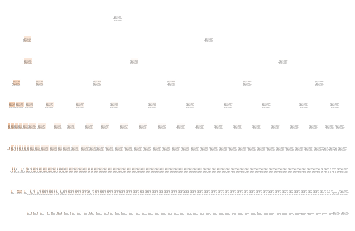

In [475]:
plot_tree(tree_regr, filled=True);

In [444]:
tree_regr_predict = tree_regr.predict(X_test.reshape(-1,1))
tree_regr_predict.shape

(4316,)

In [445]:
tree_mae_gs, tree_mse_gs, tree_r2_gs = eval_model(y_test.reshape(-1,1), tree_regr_predict)

MAE  0.0038578393782797283
MSE  0.0029918576597652746
R2   0.9983750387917848


Из 4 пункта

In [446]:
print('MAE     ',tree_mae)
print('MSE  ',tree_mse)
print('R2      ', tree_r2)

MAE      0.0026807228915665697
MSE   0.0029771779425393865
R2       0.998383011754991


In [447]:
print('MAE     ',tree_mae_gs - tree_mae)
print('MSE  ',tree_mse_gs - tree_mse)
print('R2      ', tree_r2_gs - tree_r2)

MAE      0.0011771164867131587
MSE   1.4679717225888136e-05
R2       -7.97296320620422e-06


Видим, что точность незначительно отличается. 

Еще раз сравним 3 модели:

In [450]:
print('POLY')
print('mae: {}, mse: {}, r2: {}'.format(poly_mae_gs, poly_mse_gs, poly_r2_gs))
print()
print('SVR')
print('mae: {}, mse: {}, r2: {}'.format(svr_mae_gs, svr_mse_gs, svr_r2_gs))
print()
print('TREE')
print('mae: {}, mse: {}, r2: {}'.format(tree_mae_gs, tree_mse_gs, tree_r2_gs)) 

POLY
mae: 0.4409386981151588, mse: 1.662735946164361, r2: 0.31234111102885065

SVR
mae: 0.052799879862795766, mse: 0.16717809629690494, r2: 0.9092009205521336

TREE
mae: 0.0038578393782797283, mse: 0.0029918576597652746, r2: 0.9983750387917848


### Вывод:
Лучшую точность дает модель дерево решений, далее по точности следует метод SVR, а худшую точность дает линейная модель.